In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import sys
ROOT_PATH = '/content/drive/My Drive/university/projects/NLP/project/code/'
#ROOT_PATH = '/content/drive/My Drive/code/'
sys.path.append(ROOT_PATH)

%cd /content/drive/My Drive/university/projects/NLP/project/code/
#%cd /content/drive/My Drive/code/

/content/drive/My Drive/university/projects/NLP/project/code


# Imports

In [3]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Plottings

In [0]:
def plot_top_validation_score(datasets_names,extension="",measure="accuracy",ascending=False,k=1):
  for d in datasets_names:
    df = pd.read_csv(f"{ROOT_PATH}results/{extension}{d}_results.csv",names=['exp_num','model_name','date','parameters','epoch', 
                                                                             'train_loss','validation_loss','train_accuracy','validation_accuracy'], usecols=np.arange(0,9))
    display(df.groupby(['model_name','parameters','exp_num']).apply(lambda x: x.sort_values([f"validation_{measure}"], ascending = ascending).head(k)).reset_index(drop=True))
    display(df.groupby(['model_name','parameters','exp_num']).size().reset_index(name='count'))

In [0]:
def plot_results(datasets_names,extension="",measure="accuracy",ascending=False):
  for d in datasets_names:
    df = pd.read_csv(f"{ROOT_PATH}results/{extension}{d}_results.csv", names=['exp_num','model_name','date','parameters','epoch',
                                                                              'train_loss','validation_loss','train_accuracy','validation_accuracy'], usecols=np.arange(0,9))
    
    train = df[['exp_num','model_name','date','parameters','epoch',
                'train_loss','train_accuracy']].rename(columns={"train_loss":"loss","train_accuracy":"accuracy"})
    train['split'] = 'train'
    validation = df[['exp_num','model_name','date','parameters','epoch',
                     'validation_loss','validation_accuracy']].rename(columns={"validation_loss":"loss","validation_accuracy":"accuracy"})
    validation['split'] = 'validation'
    df = pd.concat([train, validation], ignore_index=True)
    plt.figure(figsize=(35,70))
    sns.set(font_scale=2)
    g=sns.relplot(x='epoch', y=f'{measure}', kind='line',  hue='split', style='exp_num',
                data=df, row='model_name',legend='full', height=7, aspect=2.5, linewidth=3,
                    facet_kws={"sharex":False, "sharey":False})
    # g = sns.catplot(x="epoch", y=f'{measure}', hue='split', 
    #             data=df, row='model_name',legend='full', height=7, aspect=4, kind='point',
    #                sharex=False, sharey=False)
    #g.sharex=False

# Define datasets

In [0]:
datasets_names = [#"liar_binary",
                 # "liar"
                  "combined"
                  ]

# Multi Input

## Summary

In [7]:
plot_top_validation_score(datasets_names,"multi_input_")

,exp_num,model_name,date,parameters,epoch,train_loss,validation_loss,train_accuracy,validation_accuracy
0,0,BiLSTM__combined,2020-04-17 14:54:29.081612,"0.001,100,0.1",23,0.011498,0.060332,98.957386,97.319897
1,1,BiLSTM__combined,2020-04-17 17:07:58.638213,"0.001,100,0.1",15,0.018653,0.052431,98.414773,97.156703
2,2,BiLSTM__combined,2020-04-17 21:04:45.890225,"0.001,100,0.1",50,0.003699,0.068144,99.687365,97.477053
3,0,MultiBiLSTM_category_combined,2020-04-18 20:25:21.339359,"0.001,100,0.1",35,0.004467,0.063542,99.607955,97.371830
4,0,MultiBiLSTM_lexical_combined,2020-04-18 16:05:27.692794,"0.001,100,0.1",50,0.005174,0.062927,99.579545,97.462409
5,1,MultiBiLSTM_lexical_combined,2020-04-18 22:43:27.476448,"0.001,100,0.1",29,0.006987,0.061431,99.392045,97.326540
6,0,MultiBiLSTM_sentiment_combined,2020-04-18 18:08:51.164478,"0.001,100,0.1",40,0.005425,0.062885,99.508523,97.473732


,model_name,parameters,exp_num,count
0,BiLSTM__combined,"0.001,100,0.1",0,50
1,BiLSTM__combined,"0.001,100,0.1",1,40
2,BiLSTM__combined,"0.001,100,0.1",2,50
3,MultiBiLSTM_category_combined,"0.001,100,0.1",0,50
4,MultiBiLSTM_lexical_combined,"0.001,100,0.1",0,50
5,MultiBiLSTM_lexical_combined,"0.001,100,0.1",1,36
6,MultiBiLSTM_sentiment_combined,"0.001,100,0.1",0,50


## Accuracy

<Figure size 2520x5040 with 0 Axes>

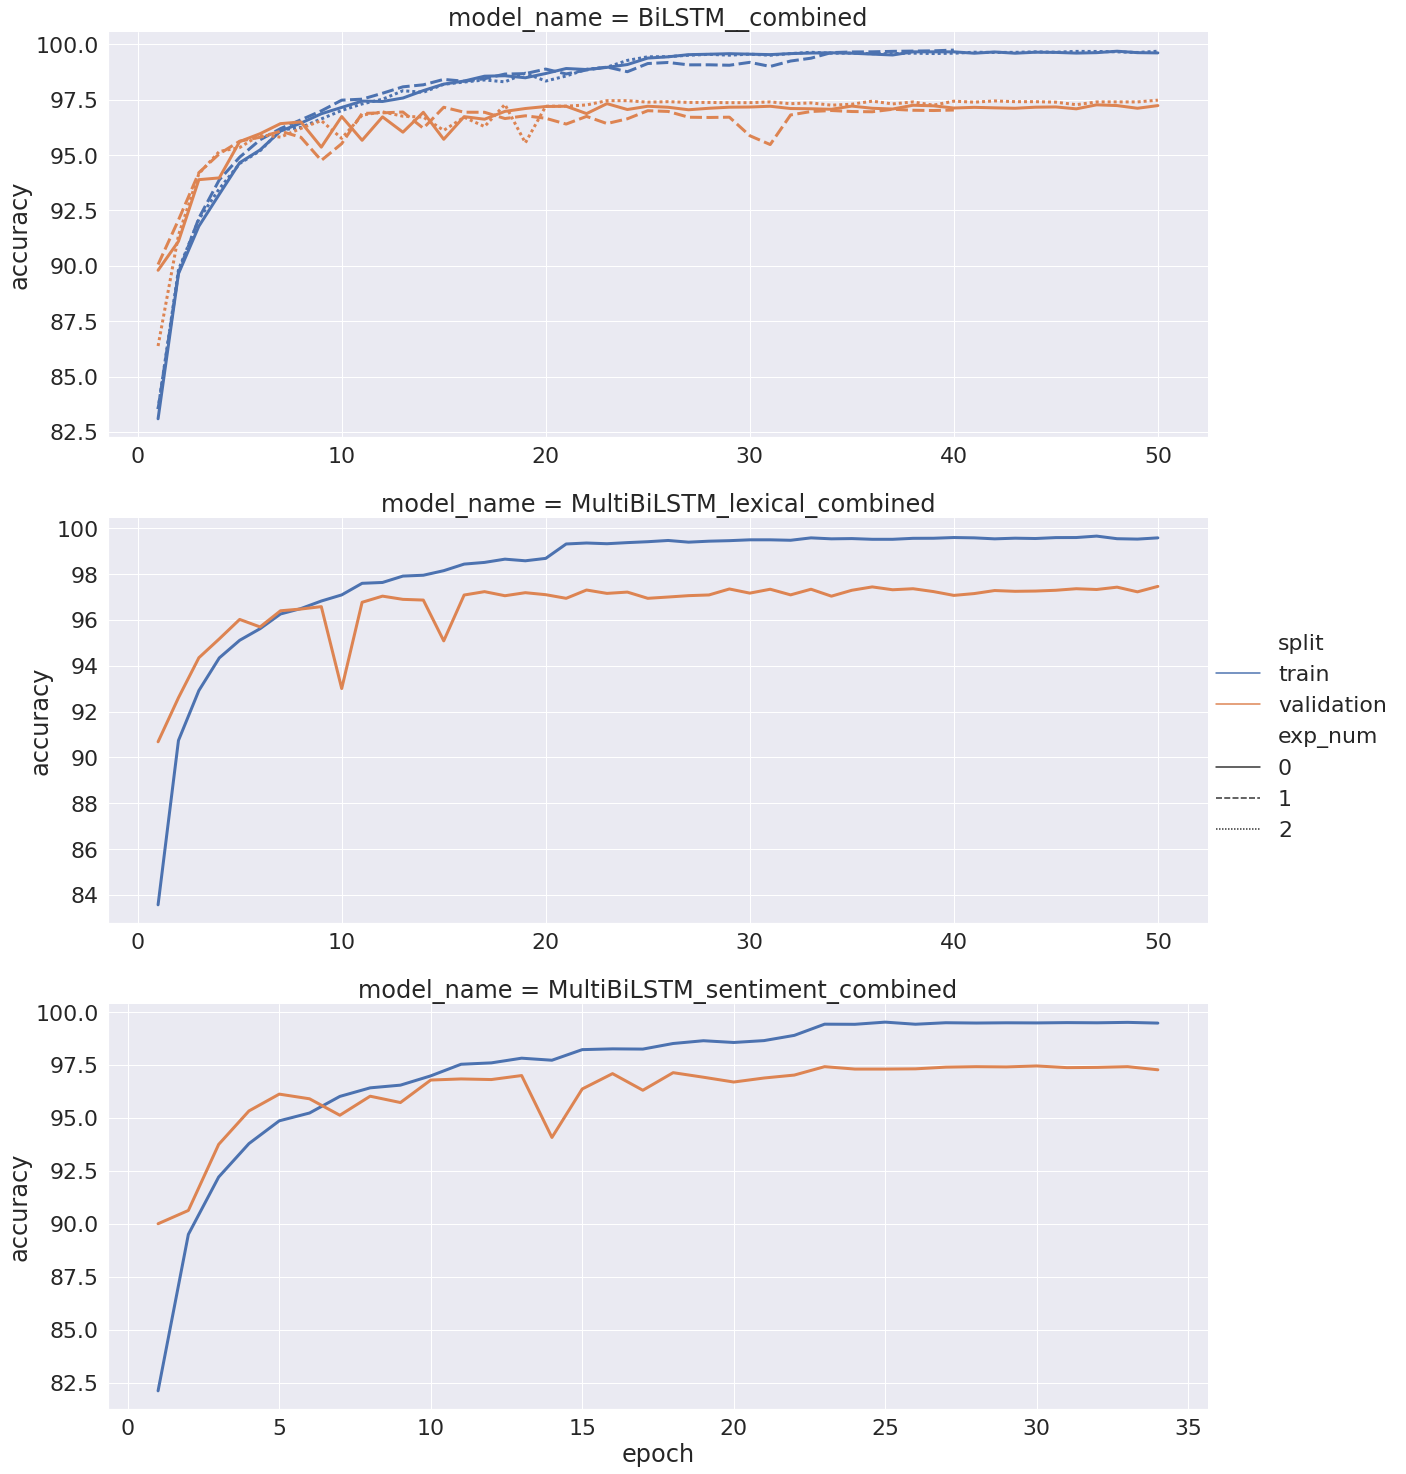

In [0]:
plot_results(datasets_names,"multi_input_")

## Loss

<Figure size 2520x5040 with 0 Axes>

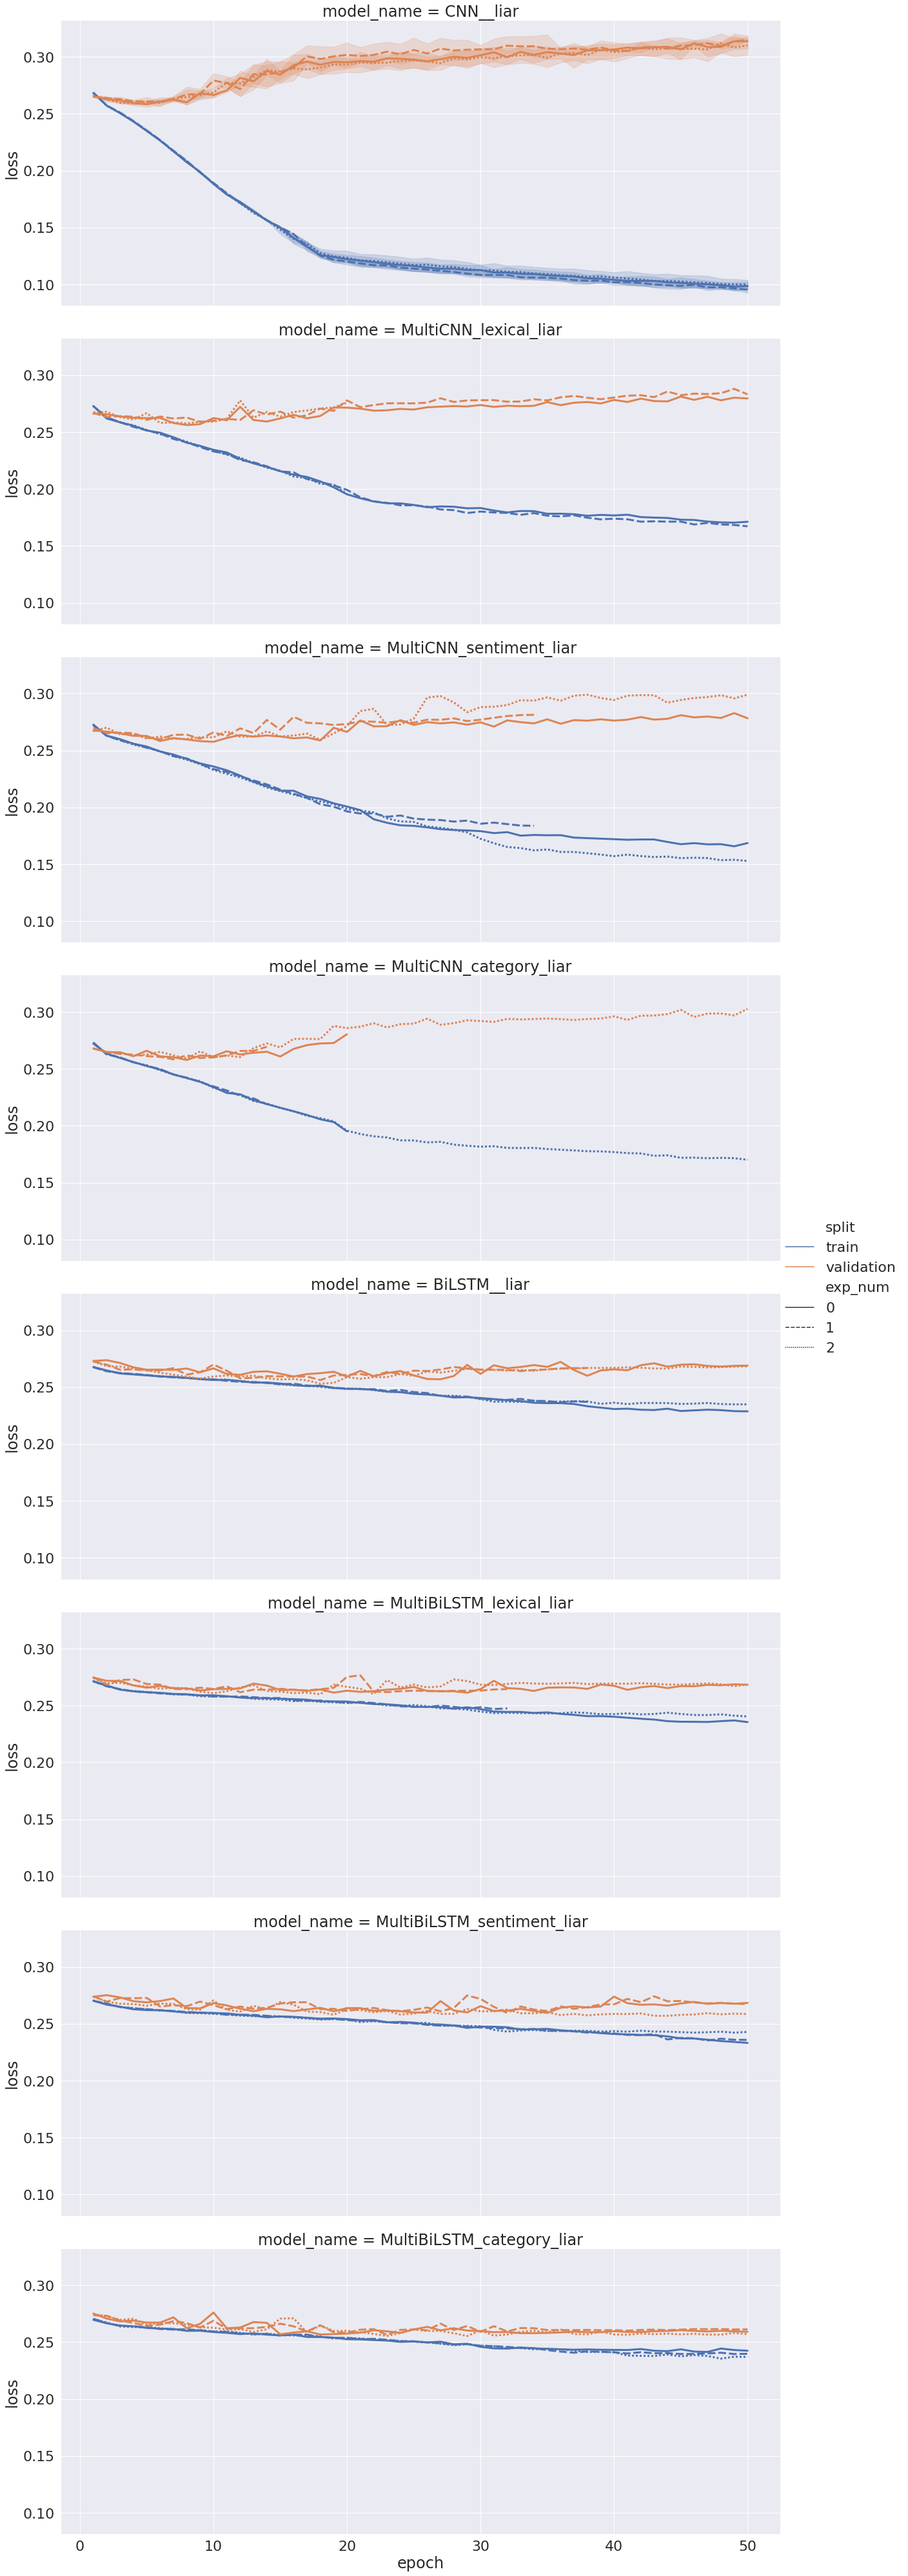

In [0]:
plot_results(datasets_names,"multi_input_","loss",True)

# Doc Embedding

## Summary

In [0]:
plot_top_validation_score(datasets_names,"doc_embedding_")

,exp_num,model_name,date,parameters,epoch,train_loss,validation_loss,train_accuracy,validation_accuracy
0,0,BiLSTM_SWEM_avg_liar,2020-04-17 09:00:25.181926,"0.001,100,0.5",37,0.248507,0.278971,26.093750,27.840909
1,1,BiLSTM_SWEM_avg_liar,2020-04-17 09:01:38.471162,"0.001,100,0.5",33,0.250670,0.273481,25.205078,30.113636
2,2,BiLSTM_SWEM_avg_liar,2020-04-17 09:02:21.446580,"0.001,100,0.5",10,0.258408,0.273127,22.265625,25.852273
3,0,BiLSTM_attention__liar,2020-04-17 08:55:49.363334,"0.001,100,0.5",21,0.252135,0.250671,24.775391,31.321023
4,1,BiLSTM_attention__liar,2020-04-17 08:57:28.681035,"0.001,100,0.5",31,0.245792,0.257295,27.744141,29.758523
5,2,BiLSTM_attention__liar,2020-04-17 08:58:49.069942,"0.001,100,0.5",28,0.247581,0.255592,27.187500,30.894886
6,0,BiLSTM_n_gram_pooling_avg_liar,2020-04-17 09:05:09.149666,"0.001,100,0.5",42,0.250674,0.283649,26.035156,27.982955
7,1,BiLSTM_n_gram_pooling_avg_liar,2020-04-17 09:06:13.712167,"0.001,100,0.5",17,0.254873,0.275131,23.447266,26.633523
8,2,BiLSTM_n_gram_pooling_avg_liar,2020-04-17 09:08:37.151774,"0.001,100,0.5",40,0.252339,0.293035,24.892578,24.573864
9,0,BiLSTM_self_attention__liar,2020-04-17 08:51:51.400923,"0.001,100,0.5",29,0.247670,0.267317,27.246094,29.332386


,model_name,parameters,exp_num,count
0,BiLSTM_SWEM_avg_liar,"0.001,100,0.5",0,50
1,BiLSTM_SWEM_avg_liar,"0.001,100,0.5",1,50
2,BiLSTM_SWEM_avg_liar,"0.001,100,0.5",2,50
3,BiLSTM_attention__liar,"0.001,100,0.5",0,50
4,BiLSTM_attention__liar,"0.001,100,0.5",1,50
5,BiLSTM_attention__liar,"0.001,100,0.5",2,50
6,BiLSTM_n_gram_pooling_avg_liar,"0.001,100,0.5",0,50
7,BiLSTM_n_gram_pooling_avg_liar,"0.001,100,0.5",1,35
8,BiLSTM_n_gram_pooling_avg_liar,"0.001,100,0.5",2,50
9,BiLSTM_self_attention__liar,"0.001,100,0.5",0,41


## Accuracy

<Figure size 2520x5040 with 0 Axes>

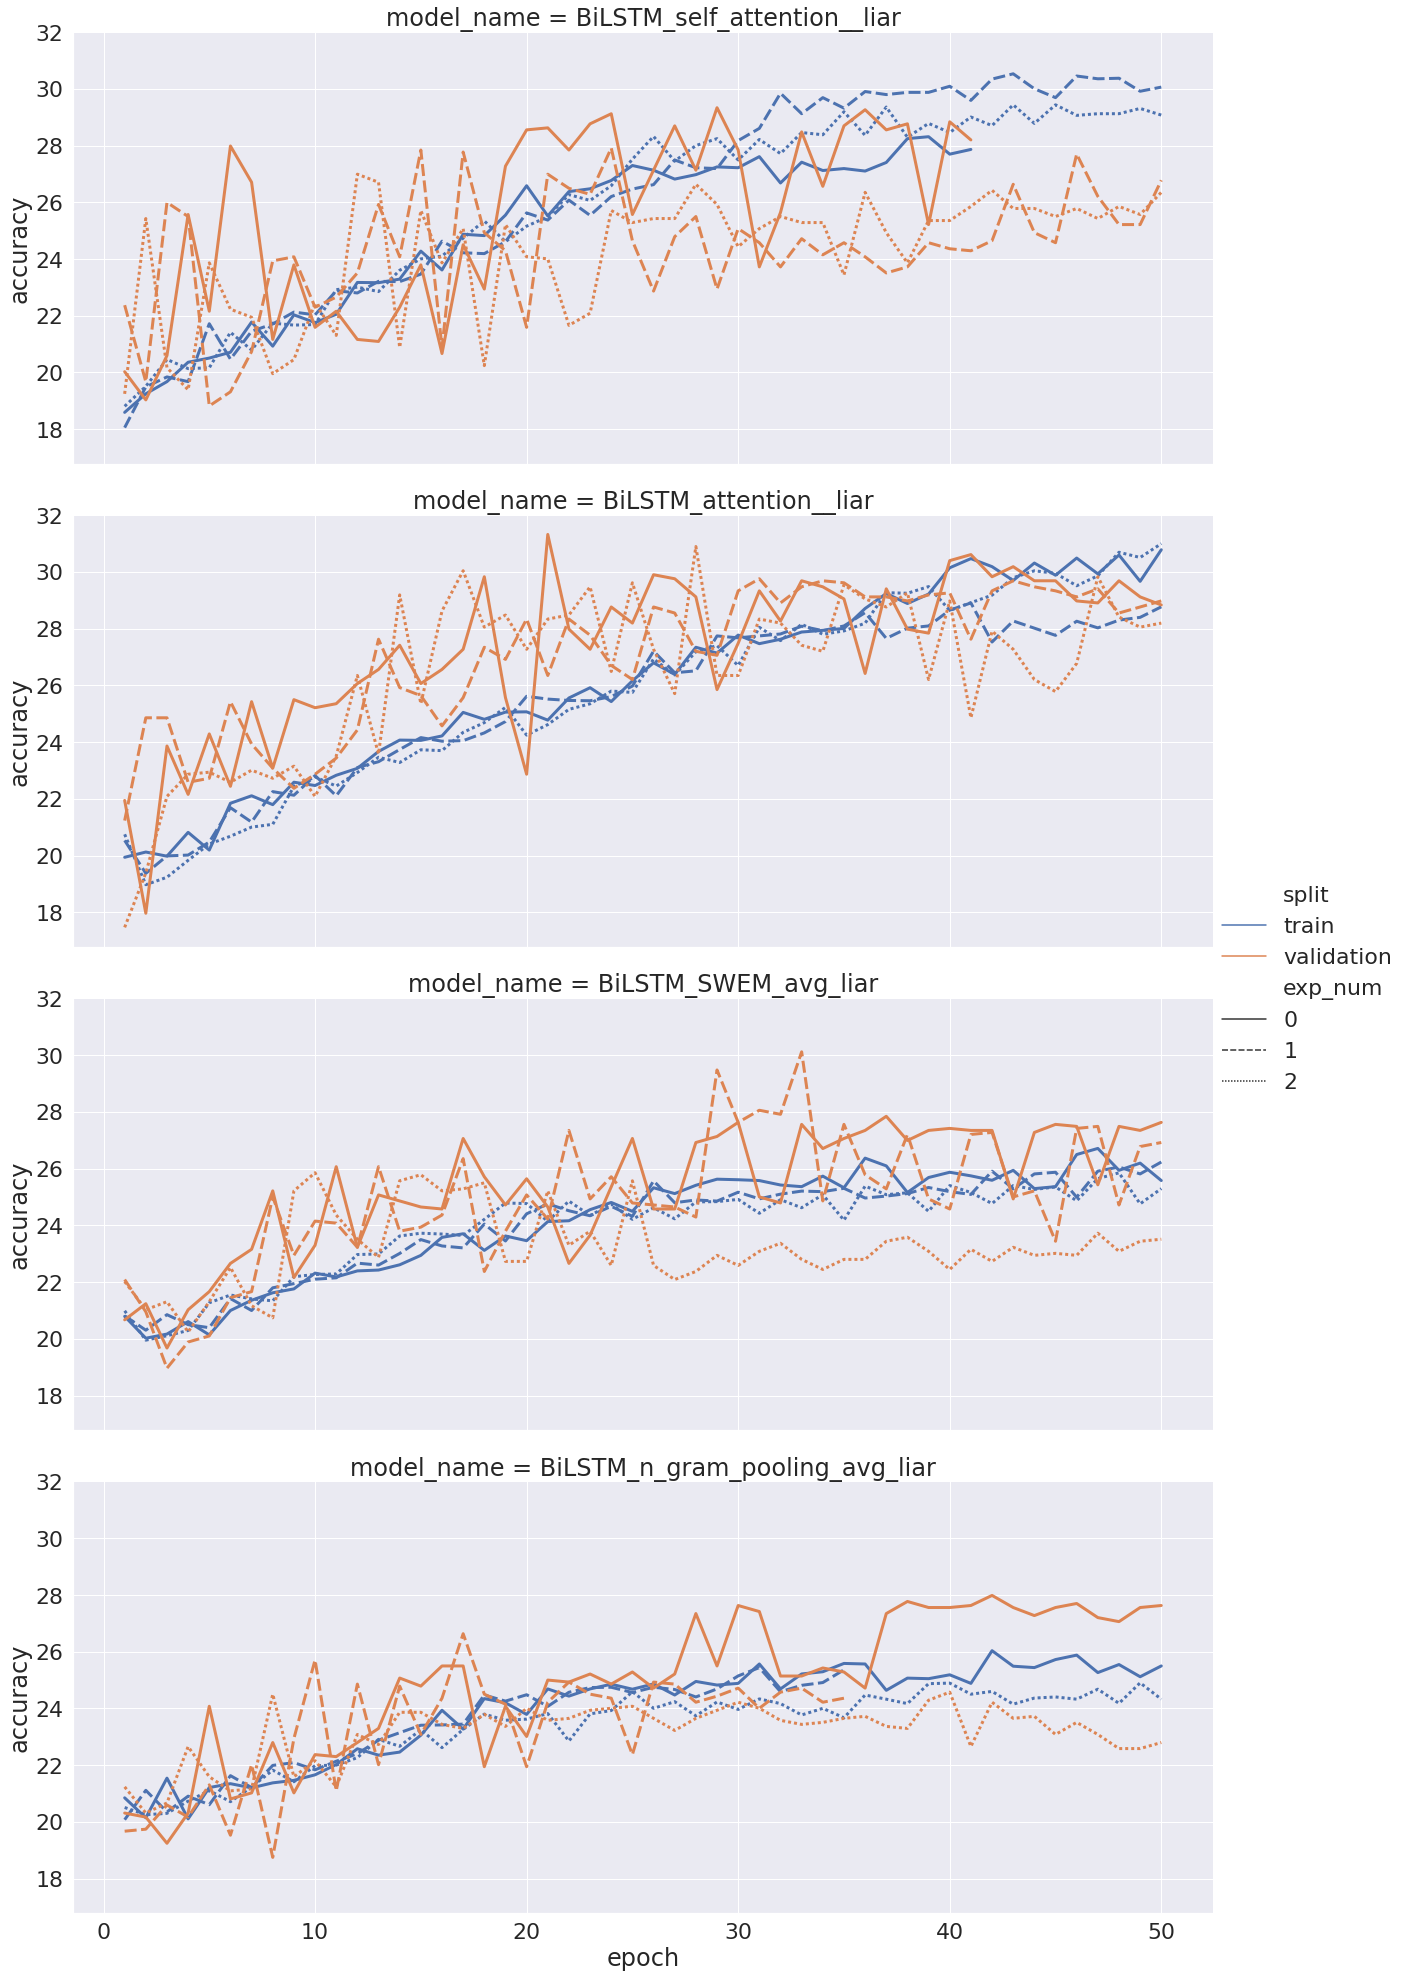

In [0]:
plot_results(datasets_names,"doc_embedding_")

## Loss

<Figure size 2520x5040 with 0 Axes>

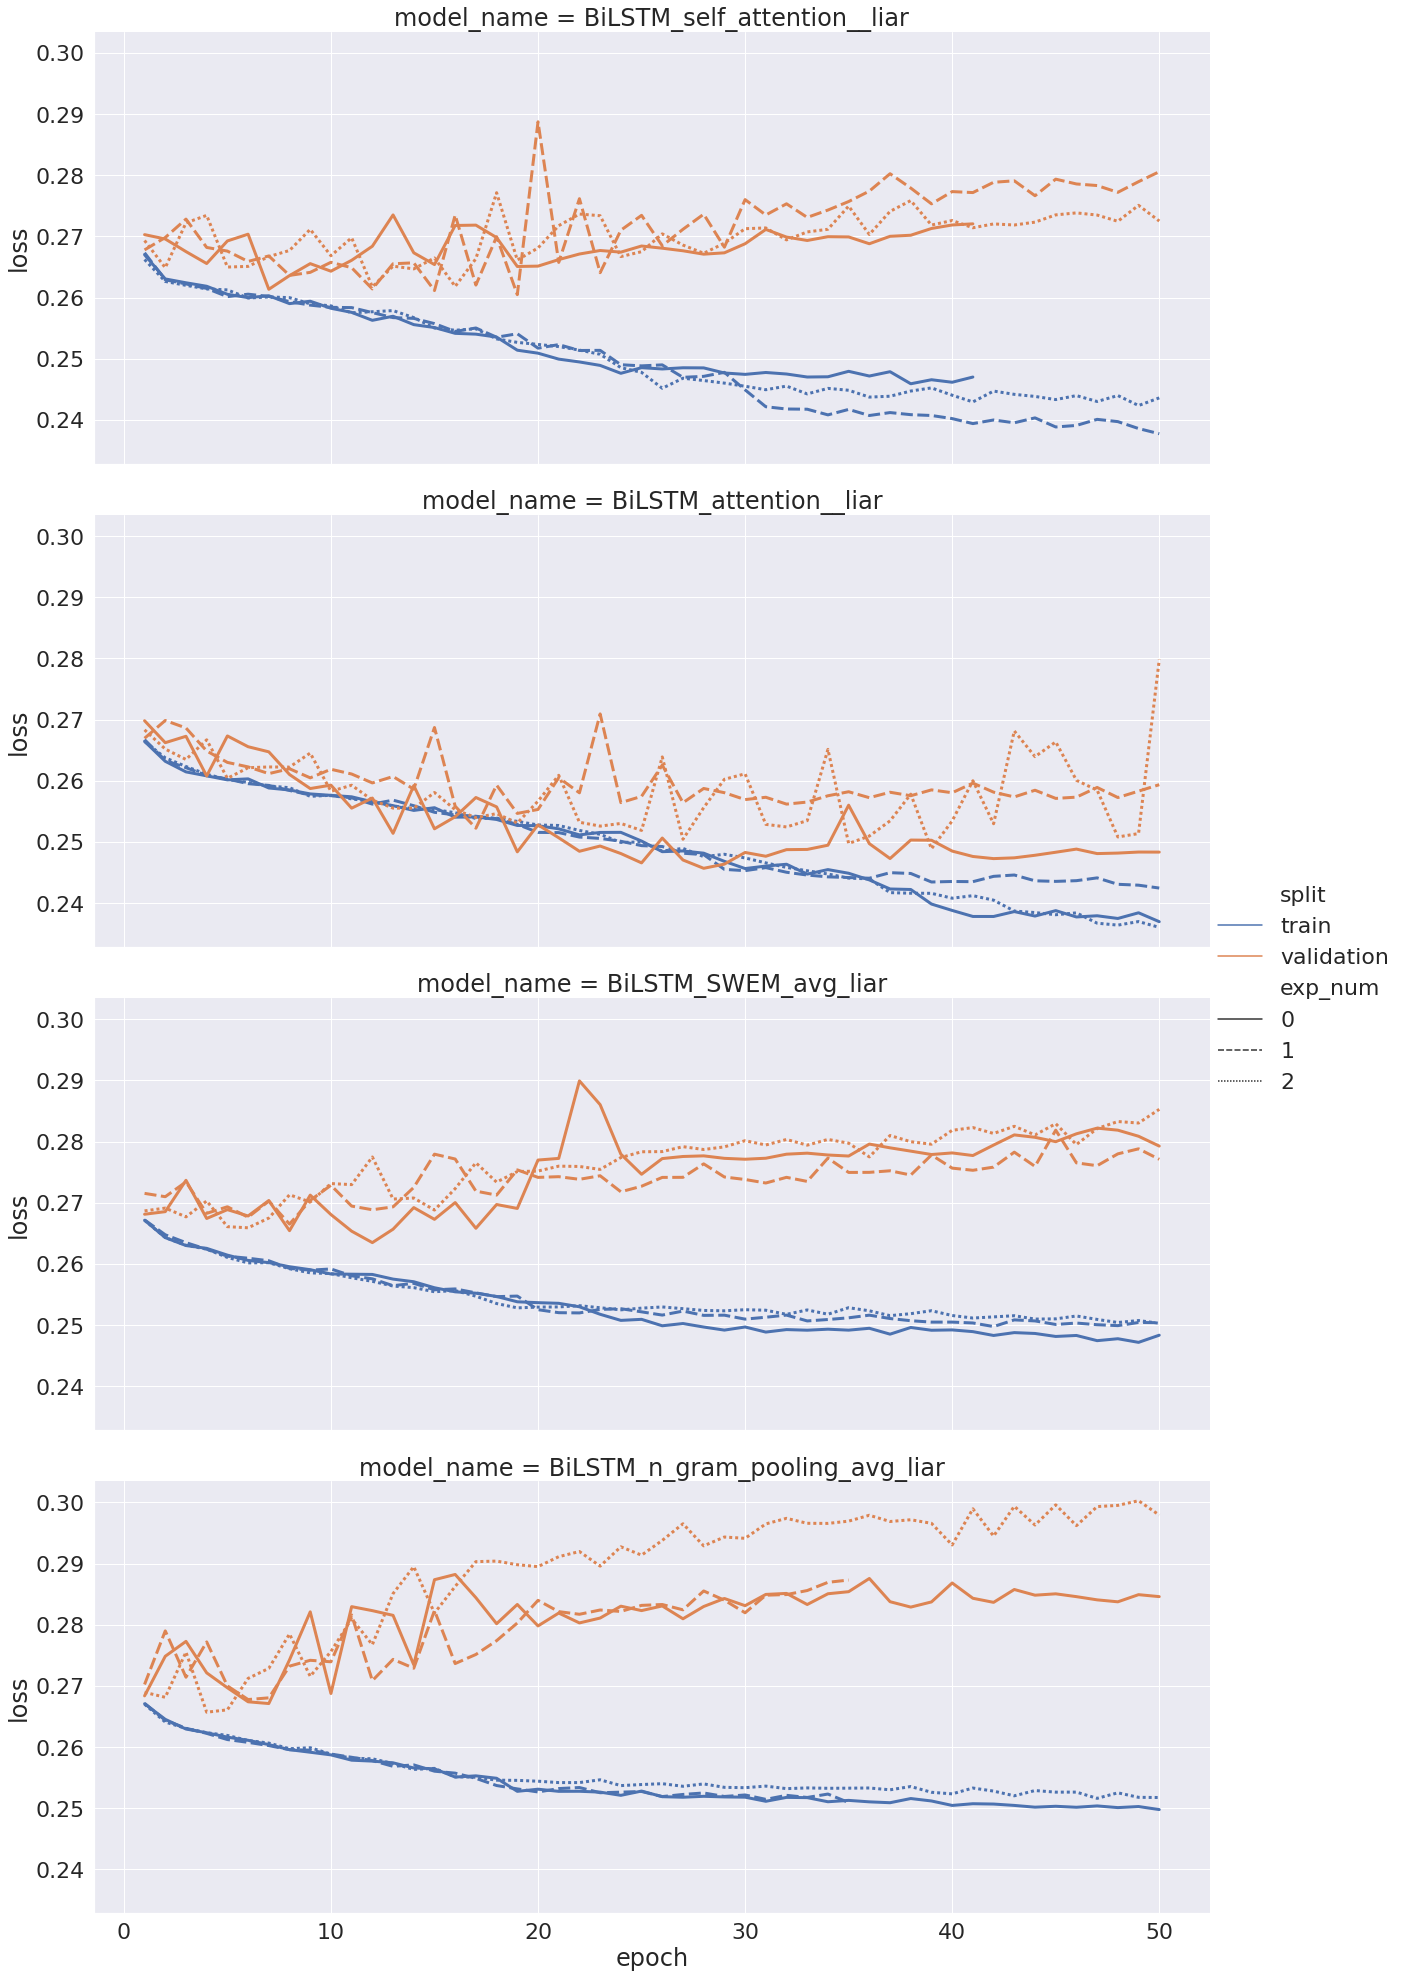

In [0]:
plot_results(datasets_names,"doc_embedding_","loss",True)